# Kerakli Kutubxonlardi tortib olamiz

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Data Pre

In [7]:
# Datamizni tortib olamiz
df=pd.read_csv("BigMart_Train.csv")

In [8]:
# datamiz bn tanishamiz
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
# datamiz bn tanishamiz
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,2,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
# datamiz haqida info olamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# datamiz bn tanishib chiqamiz
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
# Missing Valauslar bn tanishib chiqamiz
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       1
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
# Cardinalitylar bn tanishamiz

categorical_cols=["Item_Fat_Content", "Item_Type", " Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type " ]
for col in categorical_cols:
    print(f"Cardinality of "{col}": {df[col].nunique()}")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1036444999.py, line 5)

# Visualisation

([<matplotlib.patches.Wedge at 0x218f78670e0>,
 [Text(0.980107155175532, 0.49938959177552517, 'FItem_Identifier'),
  Text(-0.339918873399729, 1.0461621095732052, 'Item_Fat_Content'),
  Text(-0.4993892587836722, -0.9801073248433024, 'Outlet_Identifier'),
  Text(1.0461621838648125, -0.339918644753721, 'Item_Type')])

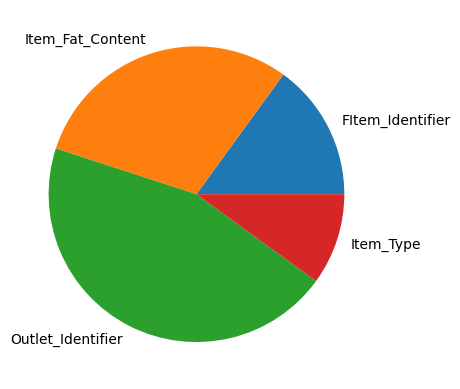

In [ ]:
labels = 'FItem_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Item_Type'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


([<matplotlib.patches.Wedge at 0x218f9ec34d0>,
 [Text(0.980107155175532, 0.49938959177552517, 'Outlet_Size'),
  Text(-0.339918873399729, 1.0461621095732052, 'Outlet_Location_Type'),
  Text(-0.4993892587836722, -0.9801073248433024, 'Outlet_Type'),
  Text(1.0461621838648125, -0.339918644753721, ' Outlet_Identifier ')])

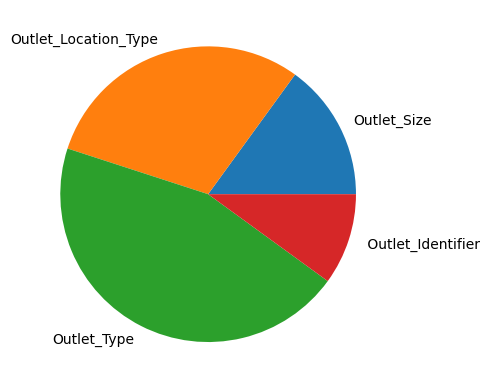

In [25]:
labels = 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', ' Outlet_Identifier '
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

([<matplotlib.patches.Wedge at 0x218fbf68190>,
 [Text(0.980107155175532, 0.49938959177552517, 'Item_Weight'),
  Text(-0.339918873399729, 1.0461621095732052, 'Item_Visibility'),
  Text(-0.4993892587836722, -0.9801073248433024, 'Item_MRP'),
  Text(1.0461621838648125, -0.339918644753721, ' Item_Outlet_Sales ')])

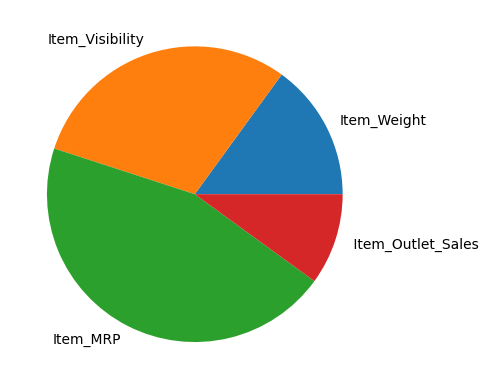

In [26]:
labels = 'Item_Weight', 'Item_Visibility', 'Item_MRP', ' Item_Outlet_Sales '
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [39]:
categorical_cols=df.select_dtypes(include=["object"]).columns

In [43]:
for col in categorical_columns:
    plt.figure(figsize=10,5)

df[col].value_counts().plot(kind="bar", color="orange",
edgecolor="black")
plt.title(f"Categorical Columns {col}")
plt.clabel(col)
plt.ylabel("Count")
plt.show()


SyntaxError: positional argument follows keyword argument (345448156.py, line 2)

In [44]:
# Missing Values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       1
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21400\509014223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)


In [47]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace=True)

In [54]:
df["Item_Type"].fillna(df["Item_Type"].mode()[0], inplace=True)

In [55]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Encoding 

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [67]:
categorical_cols=df.select_dtypes(include=["object", "category"]).columns
label_encoder=LabelEncoder()
for col in categorical_cols:
    df[col]=label_encoder.fit_transform(df[col])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [69]:
df=df.astype(int)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Identifier            8523 non-null   int64
 1   Item_Weight                8523 non-null   int64
 2   Item_Fat_Content           8523 non-null   int64
 3   Item_Visibility            8523 non-null   int64
 4   Item_Type                  8523 non-null   int64
 5   Item_MRP                   8523 non-null   int64
 6   Outlet_Identifier          8523 non-null   int64
 7   Outlet_Establishment_Year  8523 non-null   int64
 8   Outlet_Size                8523 non-null   int64
 9   Outlet_Location_Type       8523 non-null   int64
 10  Outlet_Type                8523 non-null   int64
 11  Item_Outlet_Sales          8523 non-null   int64
dtypes: int64(12)
memory usage: 799.2 KB


In [88]:
# Datani target variableni aniqlab olamiz
x=df.drop("Item_Outlet_Sales", axis=1)
y=df["Item_Outlet_Sales"]

In [89]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9,2,0,4,249,9,1999,1,0,1
1,8,5,3,0,14,48,3,2009,1,2,2
2,662,17,2,0,10,141,9,1999,1,0,1
3,1121,19,3,0,6,182,0,1998,1,2,0
4,1297,8,2,0,9,53,1,1987,0,2,1


In [90]:
y.head()

0    3735
1     443
2    2097
3     732
4     994
Name: Item_Outlet_Sales, dtype: int64

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
rf_model = RandomForestRegressor(random_state=42)

In [94]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
y_pred = rf_model.predict(x_test)

In [98]:
print("Mean Absolute Error",
      mean_absolute_error, (y_test, y_pred))
print("Root Mean Squared Error:",
      np.sqrt(mean_absolute_error(y_test, y_pred)))
print("r2_score:", r2_score(y_test,y_pred))

Mean Absolute Error <function mean_absolute_error at 0x00000218F75BEA20> (7503    1743
2957     356
7031     377
1084    5778
856     2356
        ... 
7205    3004
3257     890
6346     629
6318     253
6339     976
Name: Item_Outlet_Sales, Length: 1705, dtype: int64, array([ 796.41,  858.37,  784.97, ...,  763.02,  541.08, 1392.33]))
r2_score: 0.5482079836281825


# Hyperparameter Tuning

In [110]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 2, 4]
}

In [111]:
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid, cv=3,scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [ ]:
print('Best Parameters:', grid_search.best_params

In [ ]:
best_rf_model = grid_search.best_estimator_

In [ ]:
y_pred_tuned =best_rf_model.predict(x_test)

In [ ]:
print("Tuned Model R2 Score:", r2_score(y_test, y_pred_tuned))